In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
# Plotting setup
font = {'size': 18, 'family': 'sans-serif'}

rc('font', **font)
# rc('text', usetex=True)

In [4]:
# 2D linear wave equation
column_names = ["Type", "CFL", "Basis degree", "Number of element per wavelength", "Element size", "Degree of freedoms", "L2 error FE", "L2 error BA"]
linear = pd.read_csv("error_linear_2d.csv", names=column_names, skiprows=1)

In [5]:
linear

,Type,CFL,Basis degree,Number of element per wavelength,Element size,Degree of freedoms,L2 error FE,L2 error BA
0,Default,0.9,1,8,0.000053,243049,1.404132,5.535325e-02
1,Default,0.9,1,16,0.000026,968256,1.586135,1.400771e-02
2,Default,0.9,1,32,0.000013,3865156,0.353304,3.514383e-03
3,Default,0.9,1,64,0.000007,15444900,0.089620,8.795997e-04
4,Default,0.8,2,4,0.000106,243049,0.729594,2.145335e-02
5,Default,0.8,2,8,0.000053,970225,0.053687,2.750156e-03
6,Default,0.8,2,16,0.000026,3869089,0.003471,3.470365e-04
7,Default,0.8,2,32,0.000013,15452761,0.000229,4.350741e-05
8,Default,0.7,3,2,0.000212,136900,0.970023,1.927468e-02
9,Default,0.7,3,4,0.000106,546121,0.010945,1.879867e-03


In [6]:
linear_default = linear[linear["Type"] == "Default"]
linear_gll = linear[linear["Type"] == "GLL"]

In [7]:
linear_p1 = linear_default[linear_default["Basis degree"] == 1]
linear_p2 = linear_default[linear_default["Basis degree"] == 2]
linear_p3 = linear_default[linear_default["Basis degree"] == 3]
linear_p4 = linear_default[linear_default["Basis degree"] == 4]

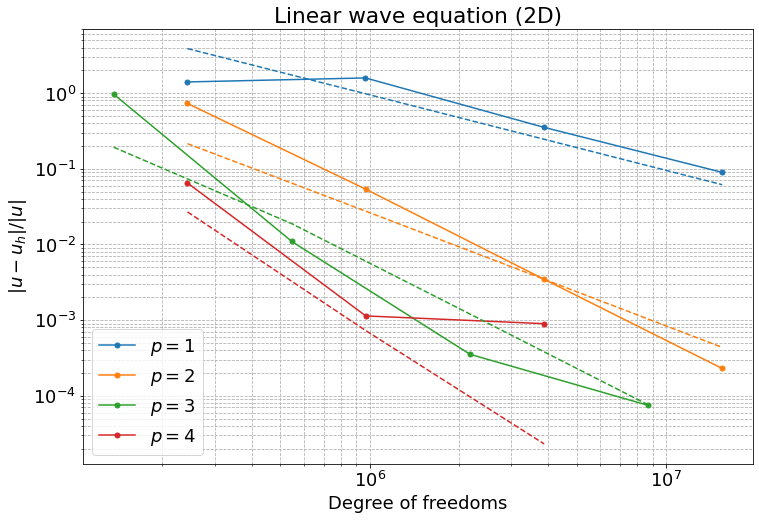

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(linear_p1["Degree of freedoms"], linear_p1["L2 error FE"], 'C0-o', ms=5, label='$p=1$')
ax.plot(linear_p2["Degree of freedoms"], linear_p2["L2 error FE"], 'C1-o', ms=5, label='$p=2$')
ax.plot(linear_p3["Degree of freedoms"], linear_p3["L2 error FE"], 'C2-o', ms=5, label='$p=3$')
ax.plot(linear_p4["Degree of freedoms"], linear_p4["L2 error FE"], 'C3-o', ms=5, label='$p=4$')

ax.plot(linear_p1["Degree of freedoms"], 70*linear_p1["L2 error BA"], 'C0--', ms=5)
ax.plot(linear_p2["Degree of freedoms"], 10*linear_p2["L2 error BA"], 'C1--', ms=5)
ax.plot(linear_p3["Degree of freedoms"], 10*linear_p3["L2 error BA"], 'C2--', ms=5)
ax.plot(linear_p4["Degree of freedoms"], 5*linear_p4["L2 error BA"], 'C3--', ms=5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Linear wave equation (2D)')
ax.set_xlabel('Degree of freedoms')
ax.set_ylabel('$|u-u_{h}|/|u|$')

plt.grid('on', which='both', linestyle='--')
plt.legend()

plt.savefig("linear_2d_default_dofs.pdf")

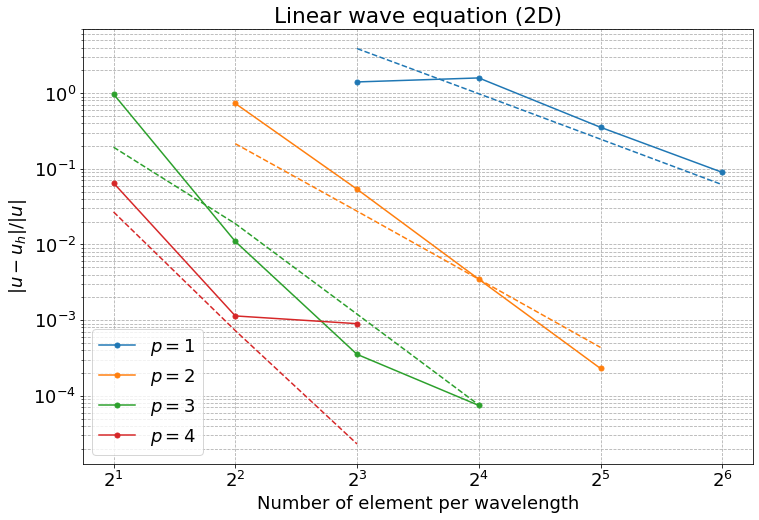

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(linear_p1["Number of element per wavelength"], linear_p1["L2 error FE"], 'C0-o', ms=5, label='$p=1$')
ax.plot(linear_p2["Number of element per wavelength"], linear_p2["L2 error FE"], 'C1-o', ms=5, label='$p=2$')
ax.plot(linear_p3["Number of element per wavelength"], linear_p3["L2 error FE"], 'C2-o', ms=5, label='$p=3$')
ax.plot(linear_p4["Number of element per wavelength"], linear_p4["L2 error FE"], 'C3-o', ms=5, label='$p=4$')

ax.plot(linear_p1["Number of element per wavelength"], 70*linear_p1["L2 error BA"], 'C0--', ms=5)
ax.plot(linear_p2["Number of element per wavelength"], 10*linear_p2["L2 error BA"], 'C1--', ms=5)
ax.plot(linear_p3["Number of element per wavelength"], 10*linear_p3["L2 error BA"], 'C2--', ms=5)
ax.plot(linear_p4["Number of element per wavelength"], 5*linear_p4["L2 error BA"], 'C3--', ms=5)

ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_title('Linear wave equation (2D)')
ax.set_xlabel('Number of element per wavelength')
ax.set_ylabel('$|u-u_{h}|/|u|$')

plt.grid('on', which='both', linestyle='--')
plt.legend()

plt.savefig("linear_2d_default_nelem_per_wavelength.pdf")

In [10]:
linear_p2_gll = linear_gll[linear_gll["Basis degree"] == 2]
linear_p3_gll = linear_gll[linear_gll["Basis degree"] == 3]
linear_p4_gll = linear_gll[linear_gll["Basis degree"] == 4]

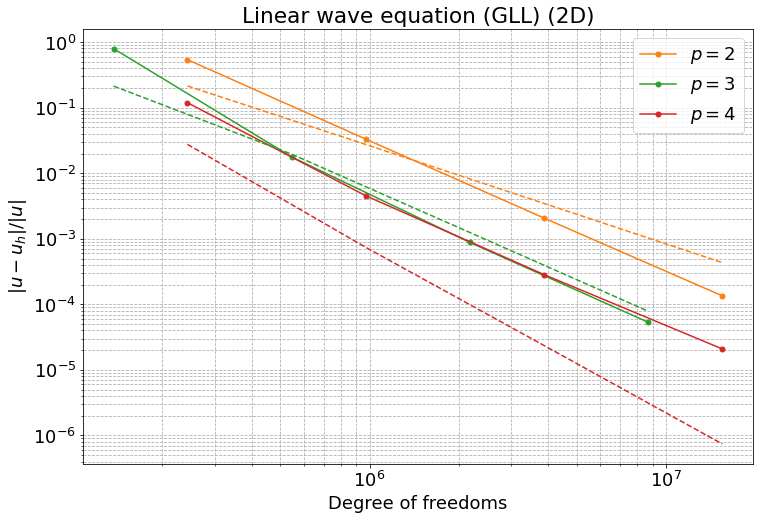

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(linear_p2_gll["Degree of freedoms"], linear_p2_gll["L2 error FE"], 'C1-o', ms=5, label='$p=2$')
ax.plot(linear_p3_gll["Degree of freedoms"], linear_p3_gll["L2 error FE"], 'C2-o', ms=5, label='$p=3$')
ax.plot(linear_p4_gll["Degree of freedoms"], linear_p4_gll["L2 error FE"], 'C3-o', ms=5, label='$p=4$')

ax.plot(linear_p2_gll["Degree of freedoms"], 10*linear_p2_gll["L2 error BA"], 'C1--', ms=5)
ax.plot(linear_p3_gll["Degree of freedoms"], 10*linear_p3_gll["L2 error BA"], 'C2--', ms=5)
ax.plot(linear_p4_gll["Degree of freedoms"], 5*linear_p4_gll["L2 error BA"], 'C3--', ms=5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Linear wave equation (GLL) (2D)')
ax.set_xlabel('Degree of freedoms')
ax.set_ylabel('$|u-u_{h}|/|u|$')

plt.grid('on', which='both', linestyle='--')
plt.legend()

plt.savefig("linear_2d_gll_dofs.pdf")

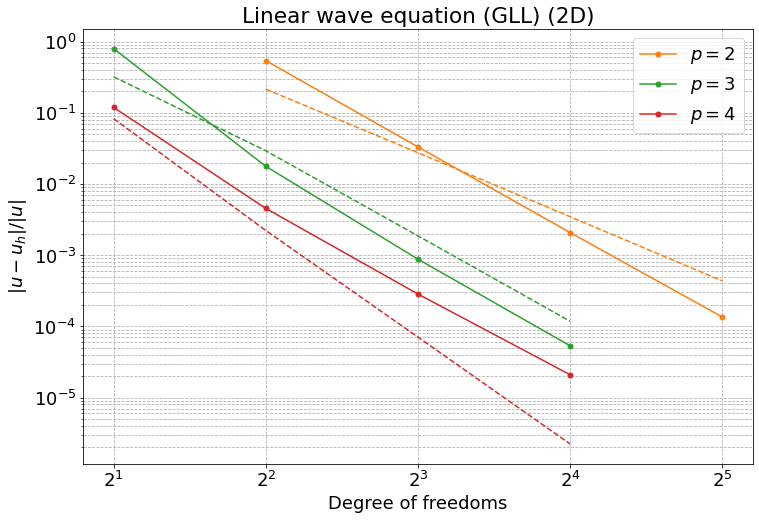

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(linear_p2_gll["Number of element per wavelength"], linear_p2_gll["L2 error FE"], 'C1-o', ms=5, label='$p=2$')
ax.plot(linear_p3_gll["Number of element per wavelength"], linear_p3_gll["L2 error FE"], 'C2-o', ms=5, label='$p=3$')
ax.plot(linear_p4_gll["Number of element per wavelength"], linear_p4_gll["L2 error FE"], 'C3-o', ms=5, label='$p=4$')

ax.plot(linear_p2_gll["Number of element per wavelength"], 10*linear_p2_gll["L2 error BA"], 'C1--', ms=5)
ax.plot(linear_p3_gll["Number of element per wavelength"], 15*linear_p3_gll["L2 error BA"], 'C2--', ms=5)
ax.plot(linear_p4_gll["Number of element per wavelength"], 15*linear_p4_gll["L2 error BA"], 'C3--', ms=5)

ax.set_xscale('log', base=2)
ax.set_yscale('log')

ax.set_title('Linear wave equation (GLL) (2D)')
ax.set_xlabel('Degree of freedoms')
ax.set_ylabel('$|u-u_{h}|/|u|$')

plt.grid('on', which='both', linestyle='--')
plt.legend()

plt.savefig("linear_2d_gll_nelem_per_wavelength.pdf")